<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Проверим,-что-эффективность-обогащения-расчитана-правильно" data-toc-modified-id="Проверим,-что-эффективность-обогащения-расчитана-правильно-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим, что эффективность обогащения расчитана правильно</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов на различных этапах очистки</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья" data-toc-modified-id="Распределение-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья</a></span></li><li><span><a href="#Суммарные-концентрации" data-toc-modified-id="Суммарные-концентрации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарные концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итогового-sMAPE" data-toc-modified-id="Функция-для-вычисления-итогового-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итогового sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import catboost

### Загрузка данных

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
df_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
df_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


***Вывод:*** Столбец date нужно перевести в числовой формат данных, формат остальных столбцов цифровой и соответствует данным. Есть небольшое количество пропущенных значений, их нужно будет заполнить.

### Проверим, что эффективность обогащения расчитана правильно

In [9]:
C = df_train['rougher.output.concentrate_ag'] # доля золота в концентрате после флотации
F = df_train['rougher.input.feed_au'] # доля золота в концентрате до флотации
T = df_train['rougher.output.tail_au'] # доля золота в хвостах после флотации

recovery = (C * (F - T)) / (F * (C - T)) * 100

recovery_mae = mean_absolute_error(df_train['rougher.output.recovery'], recovery)
print(f'MAE между расчётами и значением признака = {recovery_mae:.2f}')

MAE между расчётами и значением признака = 6.41


***Вывод:*** отклонения фактических значений от расчетных могут быть связаны с ошибками измерений и отклонениями условий протекания процессов от идеальных

### Признаки, недоступные в тестовой выборке

In [10]:
print('В тестовой выборке отсутствуют следующие столбцы')
sorted(list(set(df_full.columns) - set(df_test.columns)))

В тестовой выборке отсутствуют следующие столбцы


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

***Вывод:*** Отсутствующие в тестовой выборке столбцы замеряются и/или рассчитываются значительно позже. Кроме того, в тестовой выыборке отсутствуют целевые признаки.

### Предобработка данных

Преобразуем формат столбца date в datetime. По условиям задания "соседние по времени параметры часто похожи", поэтому заполним пропущенные значения предыдущим доступным значением.

In [11]:
df_full['date'] = pd.to_datetime(df_full['date'], yearfirst=True)
df_train['date'] = pd.to_datetime(df_train['date'], yearfirst=True)
df_test['date'] = pd.to_datetime(df_test['date'], yearfirst=True)

df_full.fillna(method='ffill', axis=0, inplace=True)
df_train.fillna(method='ffill', axis=0, inplace=True)
df_test.fillna(method='ffill', axis=0, inplace=True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

***Вывод:*** формат столбца date изменен на datetime, пропущенные значения заполнены

## Анализ данных

### Изменение концентрации металлов на различных этапах очистки

In [15]:
metals = ['au', 'ag', 'pb']

def metal_in_concentrate_plot(df, metal):
    # функция для построения графиков содержания металлов в концентрате
    plot_df = pd.DataFrame(columns=[
                                  f'{metal} на входе', # rougher.input.feed
                                  f'{metal} после флотации', # rougher.output.concentrate
                                  f'{metal} после 1 очистки',# primary_cleaner.output.concentrate
                                  f'{metal} на выходе', # final.output.concentrate
                                  ]
                         ) 
    plot_df.loc[0] = [
             df[f'rougher.input.feed_{metal}'].mean(),
             df[f'rougher.output.concentrate_{metal}'].mean(),
             df[f'primary_cleaner.output.concentrate_{metal}'].mean(),
             df[f'final.output.concentrate_{metal}'].mean()
  ]
    plot_df.plot(kind='bar', figsize=(12,6))
    return plot_df

def metal_in_tails_plot(df, metal):
    # функция для построения графиков содержания металлов в хвостах
    plot_df = pd.DataFrame(columns=[
                                  f'{metal} после флотации', # rougher.output.tail
                                  f'{metal} после 1 очистки',# primary_cleaner.output.tail
                                  f'{metal} после 2 очистки', # secondary_cleaner.output.tail
                                  f'{metal} на выходе' #final.output.tail
                                  ]
                         ) 
    plot_df.loc[0] = [
             df[f'rougher.output.tail_{metal}'].mean(),
             df[f'primary_cleaner.output.tail_{metal}'].mean(),
             df[f'secondary_cleaner.output.tail_{metal}'].mean(),
             df[f'final.output.tail_{metal}'].mean()
  ]
    plot_df.plot(kind='bar', figsize=(12,6))
    return plot_df

Изменение содержания au в концентрате на различных этапах очистки


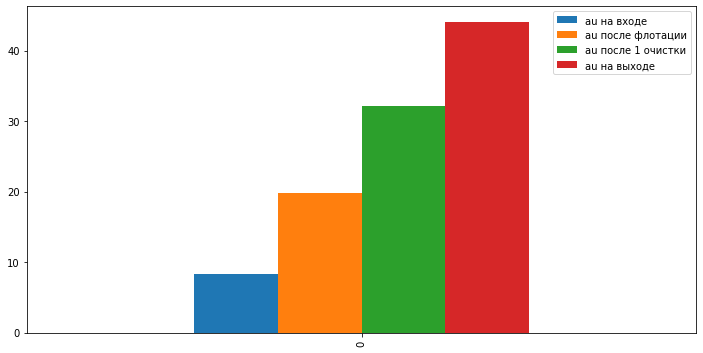

Изменение содержания ag в концентрате на различных этапах очистки


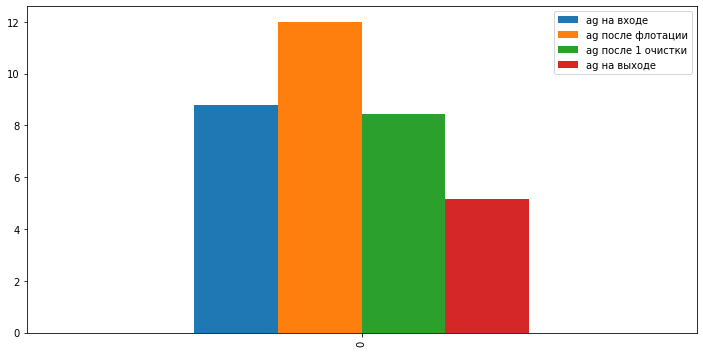

Изменение содержания pb в концентрате на различных этапах очистки


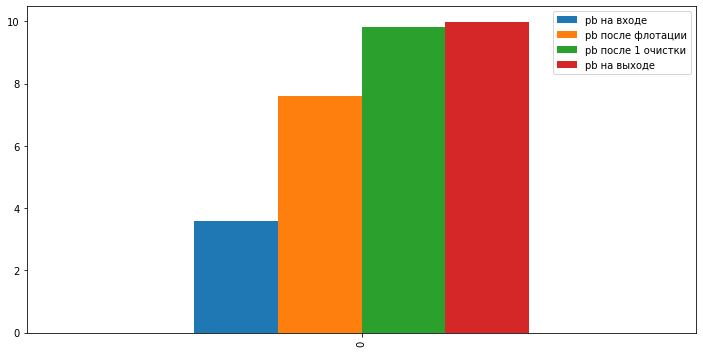

In [16]:
for metal in metals:
    print(f'Изменение содержания {metal} в концентрате на различных этапах очистки')
    metal_in_concentrate_plot(df_full, metal)
    plt.show()

Изменение содержания au в хвостах на различных этапах очистки


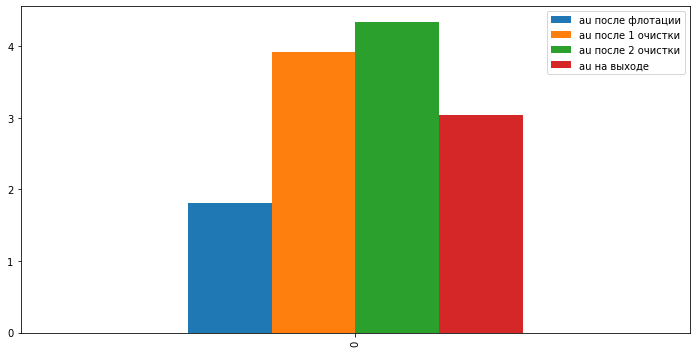

Изменение содержания ag в хвостах на различных этапах очистки


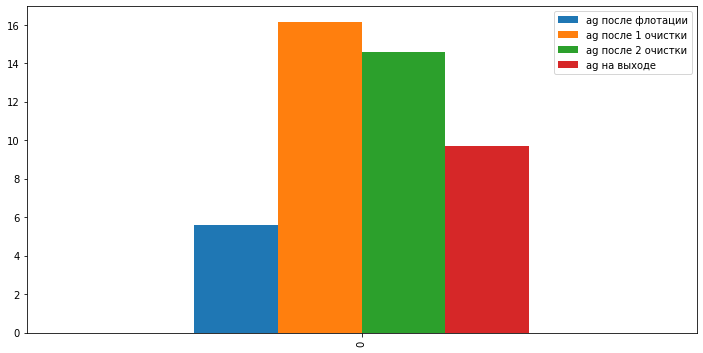

Изменение содержания pb в хвостах на различных этапах очистки


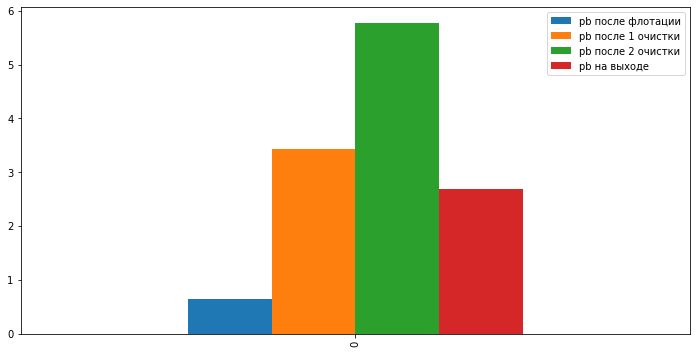

In [17]:
for metal in metals:
    print(f'Изменение содержания {metal} в хвостах на различных этапах очистки')
    metal_in_tails_plot(df_full, metal)
    plt.show()

***Выводы:*** Содержание золота в концентрате увеличивается с каждым этапом, значит процесс работает. В этом и заключается смысл обогащения - увеличение содержания целевого продукта в концентрате и уменьшение содержание всех прочих компонентов. Содержание серебра в концентрате на начальных этапах увеличивается, а потом снижается - так и должно быть, потому что серебро побочный продукт. Содержание свинца в концентрате постепенно увеличивается. Возможно, это связано с тем, что плотности золота и свинца очень близки и поэтому их разделение затруднено.

### Распределение размеров гранул сырья

In [18]:
def check_size_distribution(size1, size2):
    x_lim_min = min(size1.min(), size2.min())
    x_lim_max = max(size1.max(), size2.max())
    size1.plot(kind='kde', figsize=(12,6), label='Выборка 1', legend=True, xlim=(x_lim_min, x_lim_max))
    size2.plot(kind='kde', figsize=(12,6), label='Выборка 2', legend=True, xlim=(x_lim_min, x_lim_max))
    plt.show()
    size1.plot(kind='box', label='Выборка 1', legend=True)
    plt.show()
    size2.plot(kind='box', label='Выборка 2', legend=True)

Распределение размеров гранул сырья в обучающей и тестовой выборках на этапе флотации


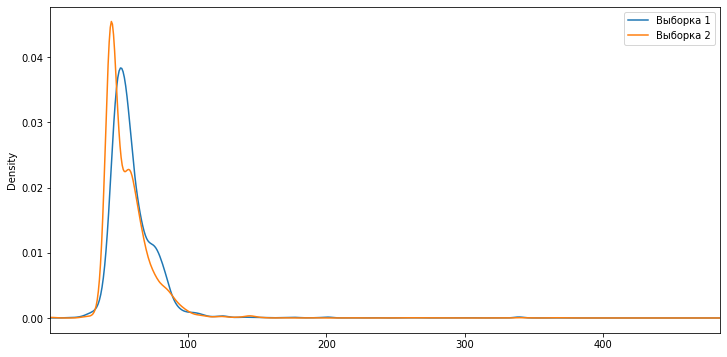

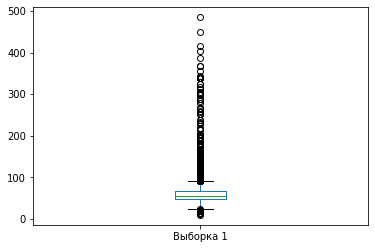

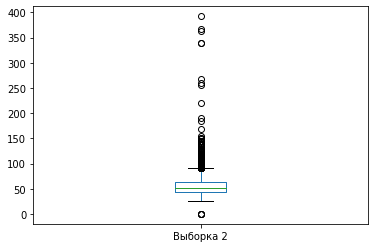

In [19]:
print('Распределение размеров гранул сырья в обучающей и тестовой выборках на этапе флотации')
check_size_distribution(df_train['rougher.input.feed_size'],
                        df_test['rougher.input.feed_size'])

Распределение размеров гранул сырья в обучающей и тестовой выборках на первом этапе очистки


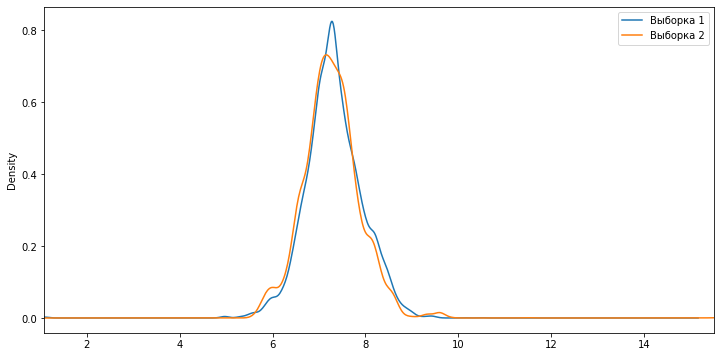

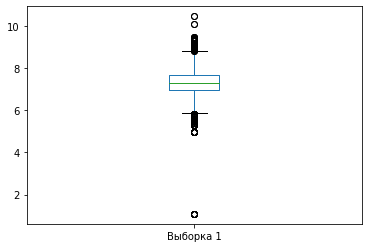

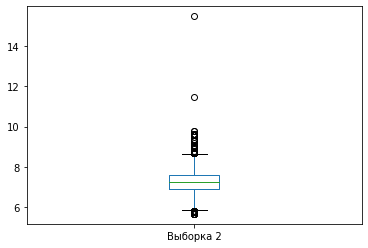

In [20]:
print('Распределение размеров гранул сырья в обучающей и тестовой выборках на первом этапе очистки')
check_size_distribution(df_train['primary_cleaner.input.feed_size'],
                        df_test['primary_cleaner.input.feed_size'])

В выборках огромное количество выбросов. Удалим выбросы, оставив только объекты, которые укладываются в полтора межквартильных размаха.

In [21]:
def remove_outliers(s):
    quantiles = s.quantile([.25, .5, .75])
    q1 = quantiles.values[0]
    q2 = quantiles.values[1]
    q3 = quantiles.values[2]
    anomal_up = q3+(q3-q1)*1.5
    anomal_down = q1-(q3-q1)*1.5
    outliers_count = len(s[(s>anomal_up)|(s<anomal_down)])
    print(f'Верхняя граница репрезентативных значений: {anomal_up:.0f}')
    print(f'Нижняя граница репрезентативных значений: {anomal_down:.0f}')
    print(f'Количество выбросов: {outliers_count} ({outliers_count/len(s):.0%})')
    print()
    return s[(s>anomal_down)&(s<anomal_up)]

In [22]:
train_rougher_no_outliers = remove_outliers(df_train['rougher.input.feed_size'])
test_rougher_no_outliers = remove_outliers(df_test['rougher.input.feed_size'])
train_primary_cleaner_no_outliers = remove_outliers(df_train['primary_cleaner.input.feed_size'])
test_primary_cleaner_no_outliers = remove_outliers(df_test['primary_cleaner.input.feed_size'])

Верхняя граница репрезентативных значений: 92
Нижняя граница репрезентативных значений: 23
Количество выбросов: 473 (3%)

Верхняя граница репрезентативных значений: 90
Нижняя граница репрезентативных значений: 16
Количество выбросов: 181 (3%)

Верхняя граница репрезентативных значений: 9
Нижняя граница репрезентативных значений: 6
Количество выбросов: 257 (2%)

Верхняя граница репрезентативных значений: 9
Нижняя граница репрезентативных значений: 6
Количество выбросов: 91 (2%)



Распределение размеров гранул сырья в обучающей и тестовой выборках на этапе флотации без выбросов


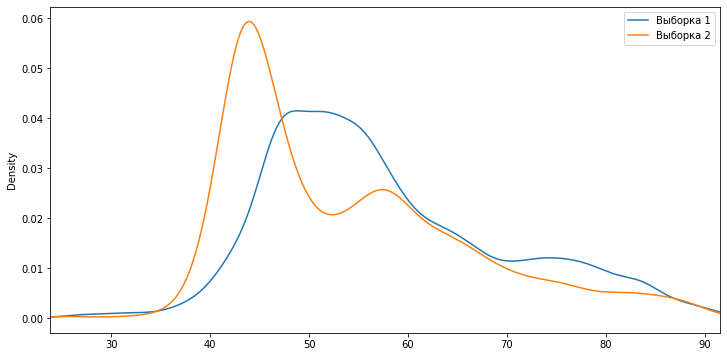

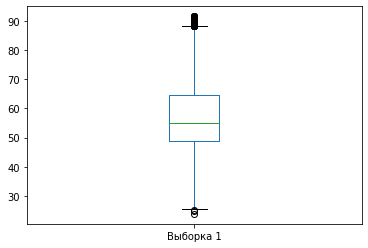

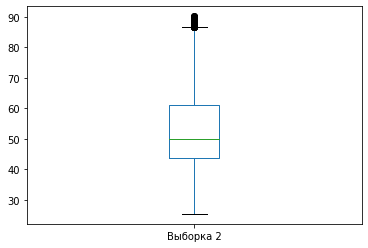

In [23]:
print('Распределение размеров гранул сырья в обучающей и тестовой выборках на этапе флотации без выбросов')
check_size_distribution(train_rougher_no_outliers,
                        test_rougher_no_outliers)

Распределение размеров гранул сырья в обучающей и тестовой выборках на первом этапе очистки без выбросов


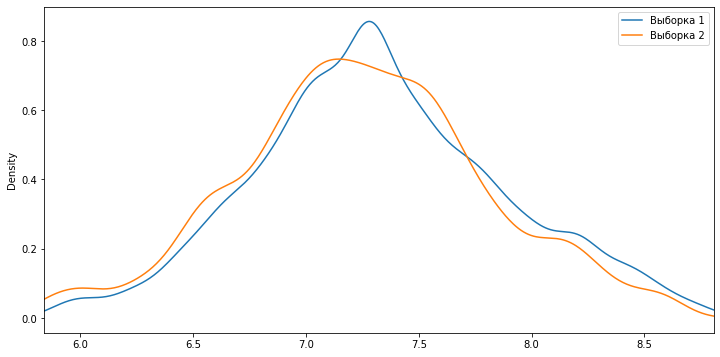

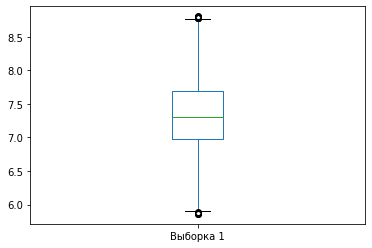

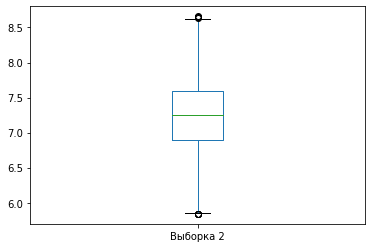

In [24]:
print('Распределение размеров гранул сырья в обучающей и тестовой выборках на первом этапе очистки без выбросов')
check_size_distribution(train_primary_cleaner_no_outliers,
                        test_primary_cleaner_no_outliers)

***Выводы:*** Графики плотностей распределения размеров гранул показывают, что гранулы обучающей и тестовой выборок существенно по размеру не различаются.

### Суммарные концентрации

In [25]:
total_con_train = df_train[[
    'rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au',
    'rougher.input.feed_ag',
    'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag',
    'rougher.input.feed_pb',
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb',
    'rougher.input.feed_sol',
    'rougher.output.concentrate_sol',
    'primary_cleaner.output.concentrate_sol',
    'final.output.concentrate_sol'
]]

In [26]:
total_con_train['total.con.rougher.input'] = total_con_train['rougher.input.feed_au'] + total_con_train['rougher.input.feed_ag']  + total_con_train['rougher.input.feed_pb'] + total_con_train['rougher.input.feed_sol']
total_con_train['total.con.rougher.output'] = total_con_train['rougher.output.concentrate_au'] + total_con_train['rougher.output.concentrate_ag']  + total_con_train['rougher.output.concentrate_pb'] + total_con_train['rougher.output.concentrate_sol']
total_con_train['total.con.primary_cleaner.input'] = total_con_train['primary_cleaner.output.concentrate_au'] + total_con_train['primary_cleaner.output.concentrate_ag']  + total_con_train['primary_cleaner.output.concentrate_pb'] + total_con_train['primary_cleaner.output.concentrate_sol']
total_con_train['total.con.final.output'] = total_con_train['final.output.concentrate_au'] + total_con_train['final.output.concentrate_ag']  + total_con_train['final.output.concentrate_pb'] + total_con_train['final.output.concentrate_sol']

/tmp/ipykernel_120/1883830523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_con_train['total.con.rougher.input'] = total_con_train['rougher.input.feed_au'] + total_con_train['rougher.input.feed_ag']  + total_con_train['rougher.input.feed_pb'] + total_con_train['rougher.input.feed_sol']
/tmp/ipykernel_120/1883830523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_con_train['total.con.rougher.output'] = total_con_train['rougher.output.concentrate_au'] + total_con_train['rougher.output.co

Суммарные концентрации металлов по стадиям


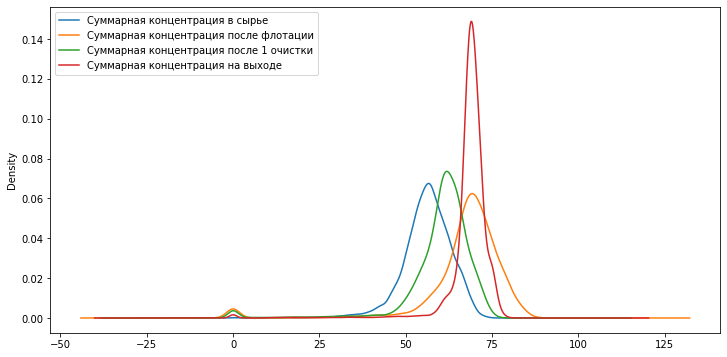

In [27]:
print('Суммарные концентрации металлов по стадиям')
total_con_train['total.con.rougher.input'].plot(kind='kde', label='Суммарная концентрация в сырье', legend=True, figsize=(12,6))
total_con_train['total.con.rougher.output'].plot(kind='kde', label='Суммарная концентрация после флотации', legend=True, figsize=(12,6))
total_con_train['total.con.primary_cleaner.input'].plot(kind='kde', label='Суммарная концентрация после 1 очистки', legend=True, figsize=(12,6))
total_con_train['total.con.final.output'].plot(kind='kde', label='Суммарная концентрация на выходе', legend=True, figsize=(12,6))
None

In [28]:
rougher_input_no_outliers = remove_outliers(total_con_train['total.con.rougher.input'])
rougher_output_no_outliers = remove_outliers(total_con_train['total.con.rougher.output'])
primary_cleaner_input_no_outliers = remove_outliers(total_con_train['total.con.primary_cleaner.input'])
final_output_no_outliers = remove_outliers(total_con_train['total.con.final.output'])

Верхняя граница репрезентативных значений: 73
Нижняя граница репрезентативных значений: 40
Количество выбросов: 346 (2%)

Верхняя граница репрезентативных значений: 86
Нижняя граница репрезентативных значений: 52
Количество выбросов: 769 (5%)

Верхняя граница репрезентативных значений: 76
Нижняя граница репрезентативных значений: 47
Количество выбросов: 669 (5%)

Верхняя граница репрезентативных значений: 76
Нижняя граница репрезентативных значений: 62
Количество выбросов: 987 (7%)



Суммарные концентрации металлов по стадиям без выбросов


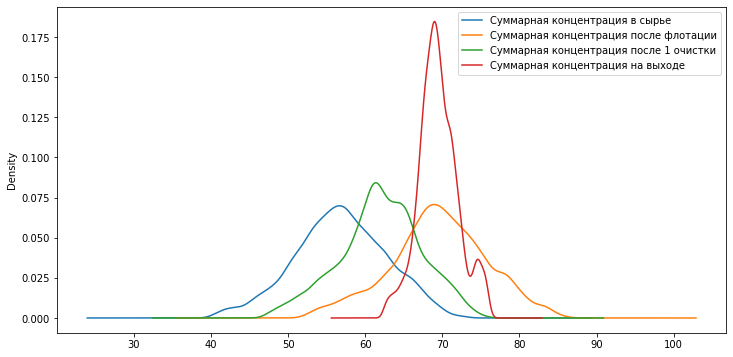

In [29]:
print('Суммарные концентрации металлов по стадиям без выбросов')
rougher_input_no_outliers.plot(kind='kde', label='Суммарная концентрация в сырье', legend=True, figsize=(12,6))
rougher_output_no_outliers.plot(kind='kde', label='Суммарная концентрация после флотации', legend=True, figsize=(12,6))
primary_cleaner_input_no_outliers.plot(kind='kde', label='Суммарная концентрация после 1 очистки', legend=True, figsize=(12,6))
final_output_no_outliers.plot(kind='kde', label='Суммарная концентрация на выходе', legend=True, figsize=(12,6))
None

***Выводы:*** В районе 0 есть аномалии, их нужно удалить.

## Модель

### Функция для вычисления итогового sMAPE

In [30]:
def smape_score(y_true, y_preds):
    y_true = np.array(y_true)
    y_preds = np.array(y_preds)

    smape_rougher = (np.abs(y_true[:,0] - y_preds[:,0]) / np.abs(y_true[:,0] + y_preds[:,0]) / 2).mean() * 100
    smape_final = (np.abs(y_true[:,1] - y_preds[:,1]) / np.abs(y_true[:,1] + y_preds[:,1]) / 2).mean() * 100 

    return 0.25 * smape_rougher + 0.75 * smape_final

smape_scorer = make_scorer(smape_score)

In [31]:
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2
    result = (error / scale).mean()
    return result*100
 

def smape_score(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final

smape_scorer = make_scorer(smape_score, greater_is_better=False)

### Обучение моделей

In [32]:
X_train = df_train[df_test.columns].drop(columns='date')
y_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
X_test = df_test.drop(columns='date')
y_test = df_test.merge(df_full, how='left', right_on='date', left_on='date')
y_test = y_test[['rougher.output.recovery', 'final.output.recovery']]

In [33]:
X_train.shape, y_train.shape

((14149, 52), (14149, 2))

In [34]:
y_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5285,95.172585,68.919891
5286,94.575036,68.440582
5287,93.018138,67.092759
5288,92.599042,68.061186


In [35]:
models = {
    'Base line - Dummmy Regressor': DummyRegressor(strategy="median"),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=0)
    }

In [36]:
for model_name in models:
    score = cross_val_score(models[model_name], X_train, y_train, scoring=smape_scorer).mean()
    print(f'{model_name} sMAPE = {-score:.2f}%')

Base line - Dummmy Regressor sMAPE = 11.48%
Linear Regression sMAPE = 12.38%
Random Forest sMAPE = 11.98%


### Проверка лучшей модели на тестовой выборке

In [37]:
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'sMAPE случайного леса на тестовой выборке = {smape_score(y_test, y_pred):.2f}%')

sMAPE случайного леса на тестовой выборке = 10.43%


In [38]:
model = DummyRegressor(strategy="median")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'sMAPE Dummmy Regressor на тестовой выборке = {smape_score(y_test, y_pred):.2f}%')

sMAPE Dummmy Regressor на тестовой выборке = 9.48%


dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(X_train, y_train_rougher)
dummy_rougher_pred = dummy_regressor_rougher.predict(X_test)
smape_dummy_rougher = smape(y_test_rougher, dummy_rougher_pred)
print(smape_dummy_rougher) 

И ДАЛЕЕ: ДЛЯ FINAL И ИТОГОВЫЙ

***Вывод:*** Результат наиболее точной модели (случайный лес) хуже точности DummyRegression. То есть, если просто взять медианное значение в качестве предсказания, то результат будет лучше, чем у используемых моделей. Для повышения точности необходимо использовать более сложные модели (например, градиентный бустинг), а также подбирать гиперпараметры по сетке (GridSearchCV).